In [247]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Get CSV Files

In [248]:
df_2015 = pd.read_csv('data_source/2015.csv')
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [249]:
df_2016 = pd.read_csv('data_source/2016.csv')
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [250]:
df_2017 = pd.read_csv('data_source/2017.csv')
df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [251]:
df_2018 = pd.read_csv('data_source/2018.csv')
df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [252]:
df_2019 = pd.read_csv('data_source/2019.csv')
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# Add Year Column

In [253]:
# Add Year column to each dataframe
df_2015["Year"] = 2015
df_2016["Year"] = 2016
df_2017["Year"] = 2017
df_2018["Year"] = 2018
df_2019["Year"] = 2019

In [254]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [255]:
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [256]:
df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [257]:
df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [258]:
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


# Machine Learning Model: Take in data & Combine Dataframes

In [259]:
# Combine 2015 and 2016 dataframes
df_2015_2016 = pd.concat([df_2015, df_2016], axis = 0)
df_2015_2016

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,NaN,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2016,3.404,3.564
153,Afghanistan,Southern Asia,154,3.360,NaN,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,2016,3.288,3.432
154,Togo,Sub-Saharan Africa,155,3.303,NaN,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2016,3.192,3.414
155,Syria,Middle East and Northern Africa,156,3.069,NaN,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2016,2.936,3.202


In [260]:
# Combine 2018 and 2019 dataframes
df_2018_2019 = pd.concat([df_2018, df_2019], axis = 0)
df_2018_2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2019


In [261]:
df_2018_2019.columns.tolist()

['Overall rank',
 'Country or region',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Year']

In [262]:
df_2017.columns.tolist()

['Country',
 'Happiness.Rank',
 'Happiness.Score',
 'Whisker.high',
 'Whisker.low',
 'Economy..GDP.per.Capita.',
 'Family',
 'Health..Life.Expectancy.',
 'Freedom',
 'Generosity',
 'Trust..Government.Corruption.',
 'Dystopia.Residual',
 'Year']

In [263]:
df_2015_2016.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual',
 'Year',
 'Lower Confidence Interval',
 'Upper Confidence Interval']

In [264]:
#rename country/region to country for 2018 2019
df_2018_2019.rename(columns={"Country or region": "Country"}, inplace=True)
df_2018_2019.head(5)

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [265]:
#rename happiness score to score for 2017 
df_2017.rename(columns={"Happiness.Score": "Score"}, inplace=True)
df_2017.head(5)

,Country,Happiness.Rank,Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [266]:
#rename happiness score to score for 2015_2016 
df_2015_2016.rename(columns={"Happiness Score": "Score"}, inplace=True)
df_2015_2016.head(5)

,Country,Region,Happiness Rank,Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN


In [267]:
df_2015_2016.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual',
 'Year',
 'Lower Confidence Interval',
 'Upper Confidence Interval']

In [268]:
df_2017.columns.tolist()

['Country',
 'Happiness.Rank',
 'Score',
 'Whisker.high',
 'Whisker.low',
 'Economy..GDP.per.Capita.',
 'Family',
 'Health..Life.Expectancy.',
 'Freedom',
 'Generosity',
 'Trust..Government.Corruption.',
 'Dystopia.Residual',
 'Year']

In [269]:
df_2018_2019.columns.tolist()

['Overall rank',
 'Country',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Year']

In [270]:
#selecting Score, Country, Year columns only
score_country_2015_2016 = df_2015_2016[['Country','Score', 'Year']]
score_country_2015_2016.head(5)

,Country,Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
3,Norway,7.522,2015
4,Canada,7.427,2015


In [271]:
#selecting Score, Country, Year columns only
score_country_2017 = df_2017[['Country','Score', 'Year']]
score_country_2017.head(5)

,Country,Score,Year
0,Norway,7.537,2017
1,Denmark,7.522,2017
2,Iceland,7.504,2017
3,Switzerland,7.494,2017
4,Finland,7.469,2017


In [272]:
#selecting Score, Country, Year columns only
score_country_2018_2019 = df_2018_2019[['Country','Score', 'Year']]
score_country_2018_2019.head(5)

,Country,Score,Year
0,Finland,7.632,2018
1,Norway,7.594,2018
2,Denmark,7.555,2018
3,Iceland,7.495,2018
4,Switzerland,7.487,2018


In [273]:
#combining df_2015_2016 with 2017 new table includes years 2015 2016 2017
score_country_2015_2017 = pd.concat([score_country_2015_2016, score_country_2017], axis = 0)
score_country_2015_2017.head(5)

,Country,Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
3,Norway,7.522,2015
4,Canada,7.427,2015


In [274]:
#combining df_2015_2017 with df_2018_2019  new table includes all years of 2015 2016 2017 2018 2019
score_country_all_five_years = pd.concat([score_country_2015_2017, score_country_2018_2019], axis = 0)
score_country_all_five_years.head(5)

,Country,Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
3,Norway,7.522,2015
4,Canada,7.427,2015


In [275]:
score_country_all_five_years

,Country,Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
3,Norway,7.522,2015
4,Canada,7.427,2015
...,...,...,...
151,Rwanda,3.334,2019
152,Tanzania,3.231,2019
153,Afghanistan,3.203,2019
154,Central African Republic,3.083,2019


# Initial Hypothesis for Machine Learning Model: Outputs Label(s) for Input Data

## Check for Linearity

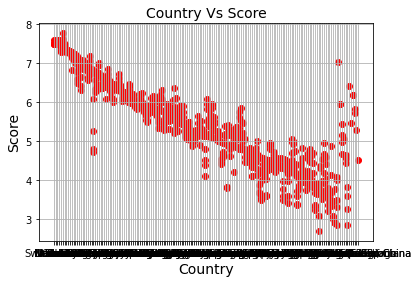

In [276]:
# Checking for Linearity (Country vs. Score)
plt.scatter(score_country_all_five_years['Country'], score_country_all_five_years['Score'], color='red')
plt.title('Country Vs Score', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid(True)
plt.show()

## Encode Country

In [277]:
# Creating an instance of label encoder
label_encoder = LabelEncoder()

# Fitting the label encoder
label_encoder.fit(score_country_all_five_years["Country"])

# List the classes identified by the label encoder
list_label_encoder = list(label_encoder.classes_)
list_label_encoder

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Haiti',
 'Honduras',
 'Hong Kong',
 'Hong Kong S.A.R., China',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Ivory Coast',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kosovo'

In [278]:
# Encode Country
score_country_all_five_years["Country Code"] = label_encoder.transform(score_country_all_five_years["Country"])
score_country_all_five_years.head()

,Country,Score,Year,Country Code
0,Switzerland,7.587,2015,145
1,Iceland,7.561,2015,61
2,Denmark,7.527,2015,38
3,Norway,7.522,2015,111
4,Canada,7.427,2015,25


# Linear Regression 

In [279]:
# Split dependent and independent variables
X = score_country_all_five_years[["Country Code"]]
y = score_country_all_five_years["Score"]

In [280]:
# Build Linear Regression model 
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [281]:
# Print Intercept & Coefficients
print(model.intercept_)
print(model.coef_)

5.335756611360891
[0.00052164]


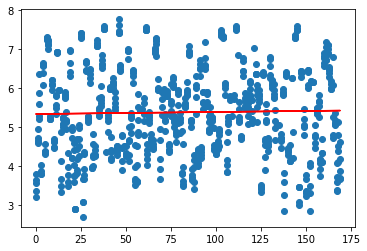

In [282]:
# Prediction
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [283]:
# Note: Not seeing linearity.

# Multiple Linear Regression (Test)

In [284]:
# Split dependent and independent variables
X = score_country_all_five_years[["Year", "Country Code"]]
y = score_country_all_five_years["Score"]

In [285]:
# Build Multi Linear Regression model 
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [286]:
# Print Intercept & Coefficients
print(model.intercept_)
print(model.coef_)

-6.039578199255189
[0.00563974 0.00052182]


In [287]:
# Prediction with sklearn
Enter_Year = 2026
Enter_Country_Code = 25
print ('Predicted Score: \n', model.predict([[Enter_Year, Enter_Country_Code]]))

Predicted Score: 
 [5.39958089]


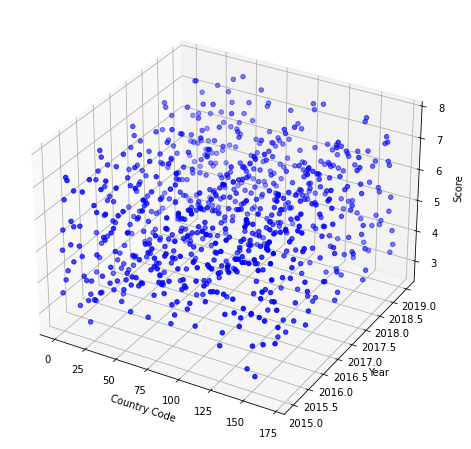

In [288]:
from mpl_toolkits.mplot3d import Axes3D

# Variables
x_ = score_country_all_five_years["Country Code"]
y_ = score_country_all_five_years["Year"]
z_ = score_country_all_five_years["Score"]

# build the figure instance
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_, y_, z_, c='blue', marker='o')

# set your labels
ax.set_xlabel('Country Code')
ax.set_ylabel('Year')
ax.set_zlabel('Score')

plt.show()

In [289]:
# Note: not seeing linearity with multi linear regression. Need to rethink approach in next sprint. 

In [290]:
# Hypothesis: need to create linear regression models for individual countries. X = year, y = score. 

# Second Hypothesis for Machine Learning Model: Outputs Label(s) for Input Data

## Check for Linearity¶

In [291]:
# Get dataframe for 
China_df = score_country_all_five_years[(score_country_all_five_years.Country == "China")]
China_df

,Country,Score,Year,Country Code
83,China,5.140,2015,29
82,China,5.245,2016,29
78,China,5.273,2017,29
85,China,5.246,2018,29
92,China,5.191,2019,29


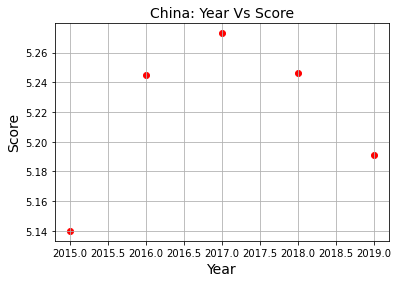

In [292]:
# Checking for Linearity (Year vs. Score)
plt.scatter(China_df['Year'], China_df['Score'], color='red')
plt.title('China: Year Vs Score', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid(True)
plt.show()

# Linear Regression 

In [293]:
# Split dependent and independent variables
X = China_df[["Year"]]
y = China_df["Score"]

In [294]:
# Build Linear Regression model 
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [295]:
# Print Intercept & Coefficients
print(model.intercept_)
print(model.coef_)

-15.55610004730238
[0.0103]


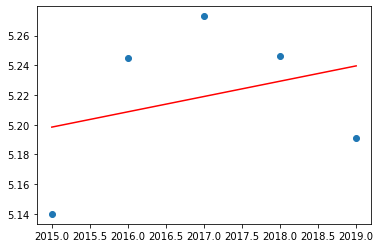

In [296]:
# Prediction
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [297]:
# Prediction with sklearn
Enter_Year = 2025
print ('Predicted Score: \n', model.predict([[Enter_Year]]))

Predicted Score: 
 [5.30139995]


In [298]:
# This model is working